In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
import seaborn as sns

Задание:

Обучите деревья с глубиной от 1 до 100. Целевой переменной при обучении является переменная species. При этом записывайте его скор (DecisionTreeClassifier.score()) на тренировочных данных, и аккуратность предсказаний (accuracy_score) на тестовом датасэте. Затем визуализируйте зависимость скора и аккуратности предсказаний от глубины дерева и выберите правильную визуализацию из предложенных.

Важно: задайте random seed прямо перед созданием дерева или укажите его в параметрах дерева (random_state=rs)

In [3]:
iris_data_train = pd.read_csv('data/train_iris.csv', index_col=0)
iris_data_test = pd.read_csv('data/test_iris.csv', index_col=0)

X_train = iris_data_train.drop(['species'], axis=1)
y_train = iris_data_train.species

X_test = iris_data_test.drop(['species'], axis=1)
y_test = iris_data_test.species


In [3]:
np.random.seed(0)
scores_data = pd.DataFrame()
max_d = range(1,100)

In [4]:
for i in max_d:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=i)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    temp_score_data = pd.DataFrame({'max_depth': [i],
                                    'train_score': [train_score],
                                    'test_score': [test_score]})
    scores_data = scores_data.append(temp_score_data)

In [5]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], 
                           value_vars=['train_score', 'test_score'],
                           var_name=['set_type'],
                           value_name='score')

scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.70
1,2,train_score,0.97
2,3,train_score,0.99
3,4,train_score,1.00
4,5,train_score,1.00


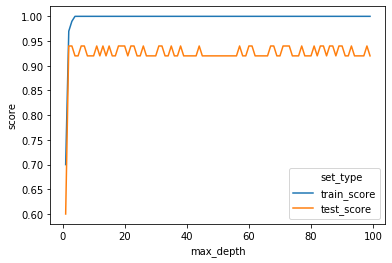

In [6]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

